In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [42]:
dataArr =  np.array([[1,5],[2,2],[3,1],[4,6],[6,8],[6,5],[7,9],[8,7],[9,8],[10,2]])
label = np.array([1,1,-1,-1,1,-1,1,1,-1,-1])


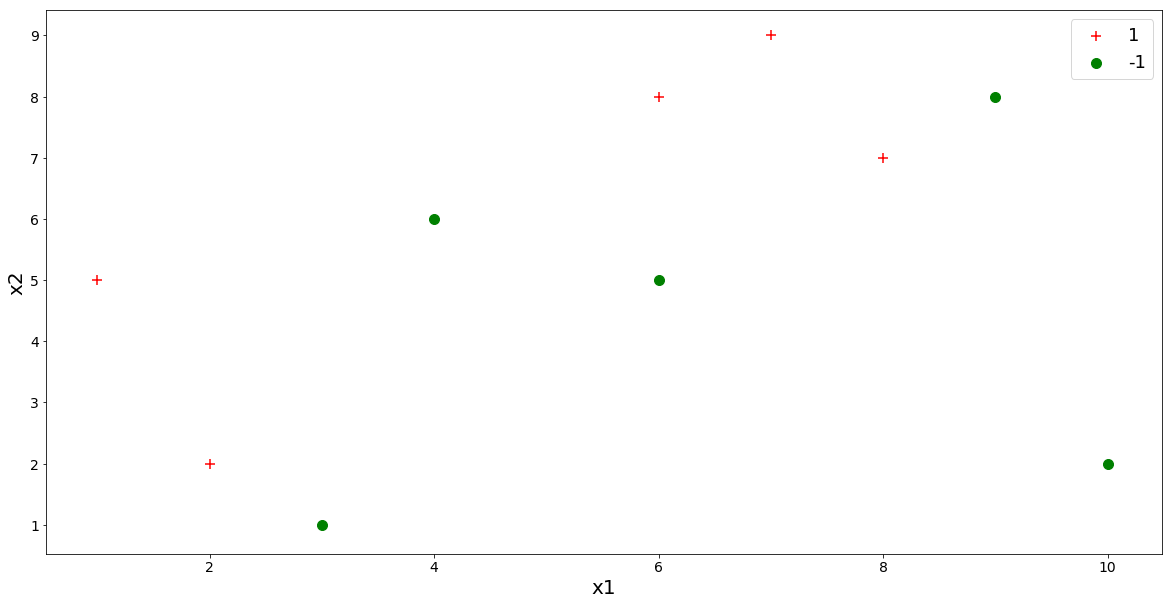

In [3]:
###绘制散点图
plt.figure(figsize=(20,10))
idx_1 = np.where(label==1)
plt.scatter(dataArr[idx_1,0],dataArr[idx_1,1],c='red',marker='+',label='1',s=100) 
idx_2 = np.where(label==-1)
plt.scatter(dataArr[idx_2,0],dataArr[idx_2,1],c='green',marker='o',label='-1',s=100)
plt.xlabel('x1',fontsize=20)
plt.ylabel('x2',fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc = 'upper right',prop={'size': 18})
plt.show()

In [16]:
def stumpClassify(dataArr,dimen,threshVal,threshIneq):
    retArray = np.ones((np.shape(dataArr)[0],1))
    if threshIneq == 'lt':
        retArray[dataArr[:,dimen] <= threshVal] = -1.0
    else:
        retArray[dataArr[:,dimen] > threshVal] = -1.0
    return retArray

In [54]:
def buildStump(dataArr,label,D):
    label = label.reshape(label.shape[0],1)
    m,n = np.shape(dataArr)    ###m代表样本行数，n代表样本列数
    numSteps = 10.0; bestStump = {}; bestClasEst = np.zeros((m,1))
    minError = 99999999
    ##两列
    for i in range(n):
        rangeMin = dataArr[:,i].min()
        rangeMax = dataArr[:,i].max()
        stepSize = (rangeMax-rangeMin)/numSteps  ##学习步长
        ##步长
        for j in range(-1,int(numSteps)+1):
            ##大于或小于当前阈值
            for temp in ['lt','gt']:
                threshVal = (rangeMin + float(j) * stepSize)   ###遍历所有阈值
                predictedVals = stumpClassify(dataArr,i,threshVal,temp)  ##计算阈值下的单层决策树结果
                errArr = np.ones((m,1))
                errArr[predictedVals == label] = 0  ##统计预测错误的样本
                weightedError = sum(D * errArr)  ##统计分类错误的样本权重和
                print "split: dim %d, thresh %.2f, thresh ineqal: %s, the weighted error is %.3f"%(i,threshVal,temp,weightedError)
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictedVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = temp
    return bestStump,minError,bestClasEst

In [55]:
D = np.ones((10,1))/5
buildStump(dataArr,label,D)

split: dim 0, thresh 0.10, thresh ineqal: lt, the weighted error is 1.000
split: dim 0, thresh 0.10, thresh ineqal: gt, the weighted error is 1.000
split: dim 0, thresh 1.00, thresh ineqal: lt, the weighted error is 1.200
split: dim 0, thresh 1.00, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 1.90, thresh ineqal: lt, the weighted error is 1.200
split: dim 0, thresh 1.90, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 2.80, thresh ineqal: lt, the weighted error is 1.400
split: dim 0, thresh 2.80, thresh ineqal: gt, the weighted error is 0.600
split: dim 0, thresh 3.70, thresh ineqal: lt, the weighted error is 1.200
split: dim 0, thresh 3.70, thresh ineqal: gt, the weighted error is 0.800
split: dim 0, thresh 4.60, thresh ineqal: lt, the weighted error is 1.000
split: dim 0, thresh 4.60, thresh ineqal: gt, the weighted error is 1.000
split: dim 0, thresh 5.50, thresh ineqal: lt, the weighted error is 1.000
split: dim 0, thresh 5.50, thresh ineq

({'dim': 0, 'ineq': 'gt', 'thresh': 2.8}, array([0.6]), array([[ 1.],
        [ 1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.],
        [-1.]]))